In [1]:
# !pip install matplotlib seaborn jovian plotly

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import jovian

pio.renderers.default = 'notebook'
%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
# dataset_url = 'https://www.kaggle.com/datasets/ashishjangra27/swiggy-restaurants-dataset'
# od.download(dataset_url)

In [4]:
df = pd.read_csv('dataset/swiggy.csv')
df

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [5]:
df.head(3)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [7]:
dfx = df.copy()

In [8]:
null_values = dfx.isna().sum()
null_values

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [9]:
#Lets apply the methods to replace the values
dfx['rating'] = dfx['rating'].str.replace('--', '0')
dfx['cost'] = dfx['cost'].str.replace('₹', '')
dfx['rating_count'] = dfx['rating_count'].str.replace('+','').str.replace('K','000').str.replace('Too Few Ratings', '0').str.replace('ratings', '')

In [10]:
dfx.head(3)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,0,0,200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50,200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100,100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json


In [11]:
dfx['rating'] = dfx['rating'].astype(float)
dfx['rating_count'] = dfx['rating_count'].fillna(0).astype(int)
dfx['cost'] = dfx['cost'].fillna(0).astype(int)

In [12]:
dfx.dropna(subset=['rating'], inplace=True)
dfx.dropna(subset=['cost'], inplace=True)
dfx.dropna(subset=['cuisine'], inplace=True)

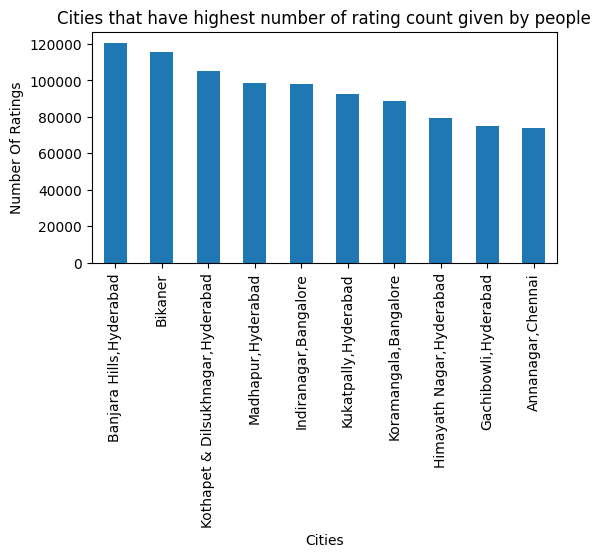

In [13]:
highest_city_rating_count = dfx.groupby('city')['rating_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,3))
highest_city_rating_count.head(10).plot.bar()
plt.xlabel('Cities')
plt.ylabel('Number Of Ratings')
plt.title('Cities that have highest number of rating count given by people')
plt.show();

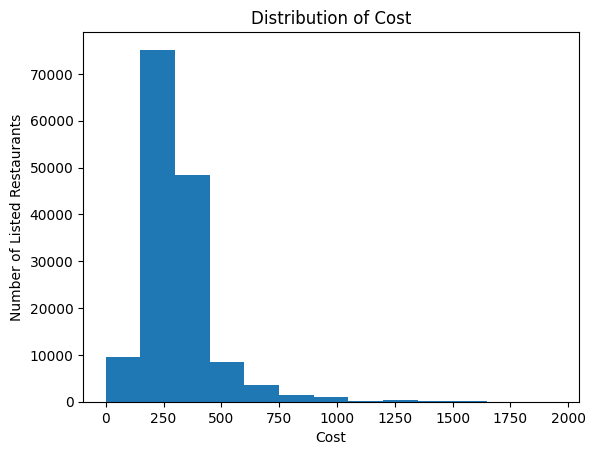

In [14]:
plt.hist(dfx['cost'], bins=np.arange(0, 2000, 150))

plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Number of Listed Restaurants')
plt.show()

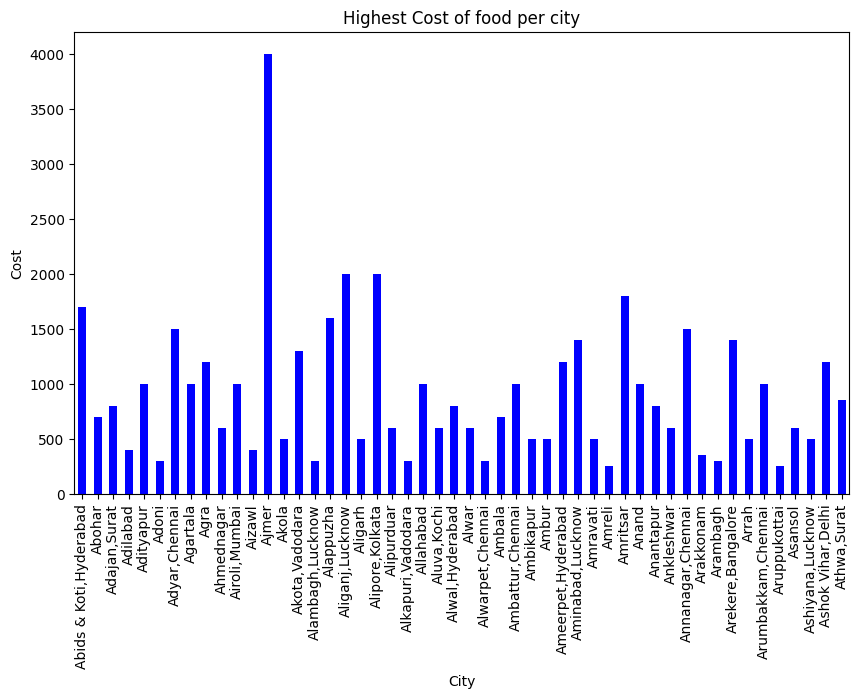

In [15]:
highest_city_cost = dfx.groupby('city')['cost'].max().head(50)

plt.figure(figsize=(10,6))
highest_city_cost.plot(kind='bar', color='blue')
plt.title("Highest Cost of food per city")
plt.xlabel("City")
plt.ylabel("Cost")
plt.xticks(rotation=90)
plt.show()

### Restaurant chains with most number of outlets

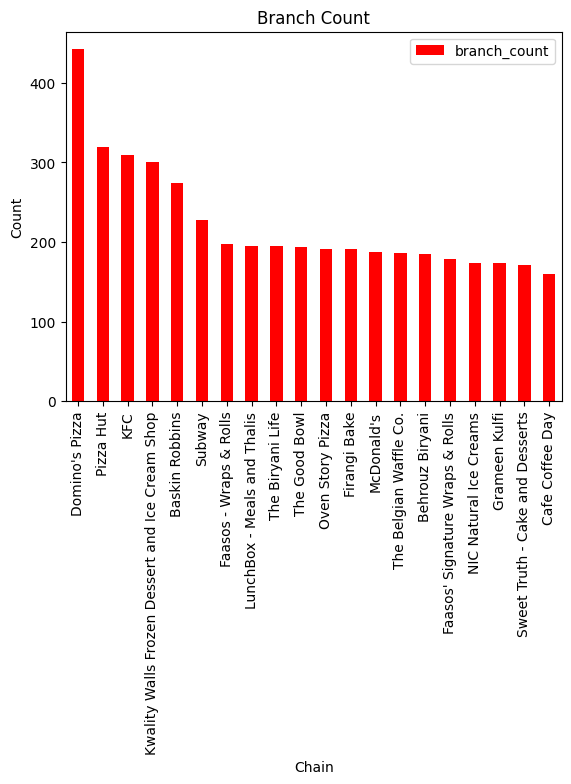

In [16]:
branch_count = dfx['name'].value_counts().reset_index()
branch_count.columns = ['name', 'branch_count']


branch_count = branch_count.sort_values(by='branch_count', ascending=False).head(20)
branch_count.plot.bar(x='name', y='branch_count', color='red')
plt.title('Branch Count')
plt.xlabel('Chain')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Cities with most expensive food in restaurant ?

In [25]:
dfx_filtered = dfx[~((dfx['name'] == 'KOHINOOR HOTEL') & (dfx['city'] == 'Hinganghat'))]
fig = px.scatter(
    dfx_filtered.nlargest(20, 'cost'),
    x='cost',
    y='rating_count',
    size = 'cost',
    color='city',
    hover_name='name',
    title="Cities with Most Expensive Food in Restaurants",
    labels={'cost': 'Cost', 'rating_count': 'Number of Ratings'}
)

# Show the plot
fig.show(renderer="iframe")

### What are the most Popular Cuisines served throughout the dataset ?

In [26]:
a = []
for i in dfx['cuisine'].values:
    try:
        for j in i.split(','):
            a.append(j)
            
    except:
        a.append(i) 
        
popular_cuisine_df = pd.DataFrame({"all_cuisine":a}).value_counts()
popular_cuisine_df.head(10)

all_cuisine 
Chinese         36464
North Indian    32537
Indian          25716
Snacks          17231
Biryani         14523
Beverages       14270
Fast Food       13892
South Indian    12014
Desserts        11193
Pizzas           9845
Name: count, dtype: int64

### Most Popular restaurants in the nation ?

In [28]:
rating_count_100_df = dfx[dfx['rating_count']>=100]
top_5_popular_chains_df = rating_count_100_df.groupby('name')['rating'].mean().sort_values(ascending=False).head(5)
top_5_popular_chains_df

name
SHRI KRISHNA FOOD ZONE         5.0
Tony Bakery                    5.0
Ram Fast Food                  4.9
Mahi Bakery                    4.9
Aaradhya cafe and fast food    4.9
Name: rating, dtype: float64